# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,814,85,43,66,123,55,7,150,45,19,146,172,326,173,83,4,15,180,183
1,324,94,38,88,179,60,7,170,39,21,131,188,435,144,66,2,28,195,204
2,823,105,54,105,213,67,10,200,33,23,163,214,597,214,68,10,20,190,198
3,622,96,40,100,178,58,8,181,37,21,134,205,486,160,68,5,34,192,202
4,71,97,59,108,227,70,11,224,30,25,186,225,732,218,70,10,25,186,198
5,527,109,49,103,186,57,11,206,32,23,156,212,630,186,65,12,21,192,201
6,348,95,44,84,158,62,10,145,46,19,148,163,312,166,64,10,6,199,206
7,474,82,40,73,141,57,8,153,44,19,133,173,342,153,75,11,9,181,187
8,127,85,41,66,155,65,22,149,45,19,139,173,330,155,75,6,16,184,191
9,89,80,37,57,116,55,6,125,54,18,125,142,229,132,81,8,5,178,184


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,422.624772,93.905282,45.129326,82.442623,169.775956,61.854281,8.703097,169.939891,40.686703,20.672131,148.535519,189.459016,445.663024,176.262295,72.606557,6.535519,12.632058,188.819672,195.515483
std,242.087058,8.327147,6.248769,15.862171,33.669428,7.830357,4.923985,33.621960,7.797168,2.633648,14.707399,31.333802,179.794046,32.562243,7.399573,5.165961,9.046078,6.177299,7.425189
min,0.000000,76.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,219.000000,87.000000,40.000000,70.000000,143.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,168.000000,321.000000,151.000000,67.000000,2.000000,5.000000,184.000000,190.000000
50%,416.000000,93.000000,45.000000,80.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,147.000000,179.000000,366.000000,176.000000,72.000000,6.000000,11.000000,188.000000,197.000000
75%,638.000000,100.000000,50.000000,98.000000,197.000000,65.000000,10.000000,200.000000,46.000000,23.000000,160.000000,217.000000,601.000000,199.000000,76.000000,10.000000,19.000000,193.000000,201.000000
max,844.000000,119.000000,59.000000,112.000000,322.000000,133.000000,55.000000,262.000000,61.000000,28.000000,186.000000,288.000000,987.000000,268.000000,127.000000,22.000000,41.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [20]:
# Normalizing the data
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train) # Fit only to the training data to avoid data leakage
X_test = std_scaler.transform(X_test)

In [21]:
# use integers as class labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression(
  multi_class='multinomial',
  solver='saga',
  max_iter=500,
  tol=1e-3,
)

param_grid = {
    'C': [0.1, 1, 5, 10],
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(log_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
grid_acc_score = accuracy_score(y_test, y_pred)
grid_f1_score = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {grid_acc_score:.4f}')
print(f'F1: {grid_f1_score:.4f}')

{'C': 1, 'penalty': 'l1'}
Accuracy: 0.7811
F1: 0.7808


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

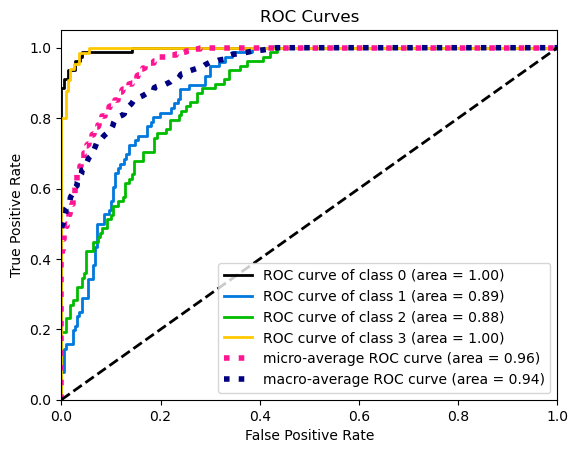

In [29]:
from scikitplot.metrics import plot_roc

best_est_lr = grid_search.best_estimator_
predicted_probas = best_est_lr.predict_proba(X_test)

plot_roc(y_test, predicted_probas)

In [ ]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

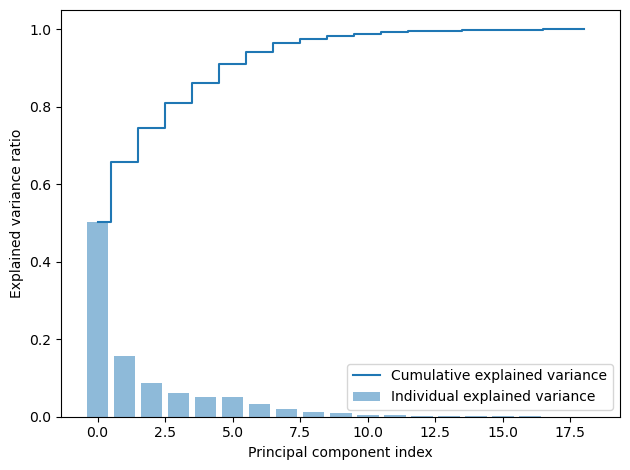

In [36]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(explained_variance)

import matplotlib.pyplot as plt

plt.bar(range(0, len(explained_variance)), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0, len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [37]:
# From the plot, we can see that the first 6 principal components explain most of the variance in the data.
# We have to use normalized data for PCA, so that large-valued features do not dominate the first principal components.

pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

/Users/fortune/miniconda3/envs/hs-ml/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


{'log_reg__C': 1, 'log_reg__penalty': 'l2', 'pca__n_components': 14}
Accuracy: 0.7441
F1: 0.7436


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

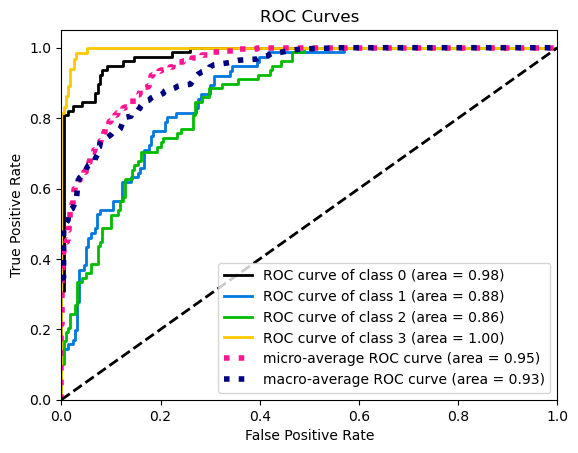

In [40]:
# using grid search to find the best hyperparameters for logistic regression and pca combined
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('pca', PCA()),
    ('log_reg', LogisticRegression(
        multi_class='multinomial',
        solver='saga',
        max_iter=500,
        tol=1e-3,
    ))
])

param_grid = {
    'pca__n_components': [2, 4, 6, 8, 10, 12, 14],
    'log_reg__C': [0.1, 1, 5, 10],
    'log_reg__penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

y_pred = grid_search.predict(X_test)
grid_acc_score = accuracy_score(y_test, y_pred)
grid_f1_score = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {grid_acc_score:.4f}')
print(f'F1: {grid_f1_score:.4f}')

best_est_pipe = grid_search.best_estimator_
predicted_probas = best_est_pipe.predict_proba(X_test)

plot_roc(y_test, predicted_probas)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy: 0.7104
F1: 0.6988


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

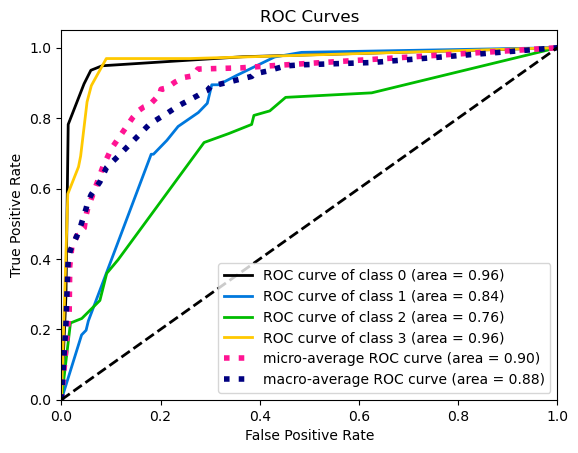

In [41]:
from sklearn.tree import DecisionTreeClassifier
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
y_pred = grid_search.predict(X_test)
grid_acc_score = accuracy_score(y_test, y_pred)
grid_f1_score = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {grid_acc_score:.4f}')
print(f'F1: {grid_f1_score:.4f}')

best_est_tree = grid_search.best_estimator_
predicted_probas = best_est_tree.predict_proba(X_test)

plot_roc(y_test, predicted_probas)

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

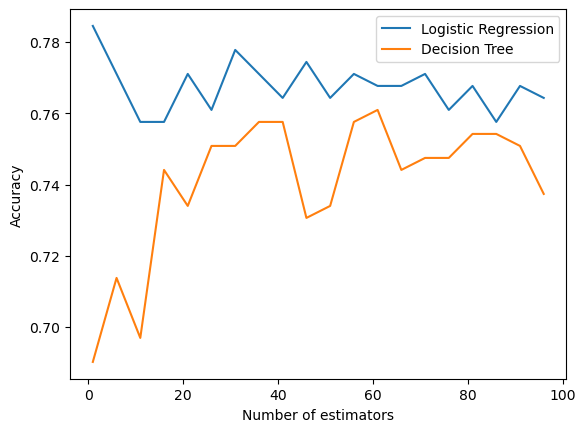

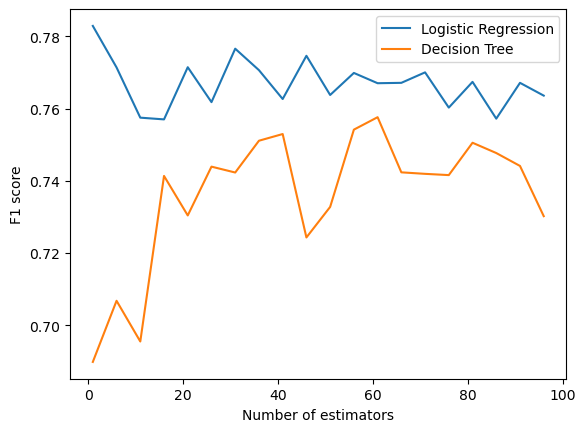

In [42]:
from sklearn.ensemble import BaggingClassifier

n_estimators = np.arange(1, 100, 5)
accuracy_lr = []
f1_lr = []
accuracy_tree = []
f1_tree = []

for n in n_estimators:
    bagging_lr = BaggingClassifier(best_est_lr, n_estimators=n)
    bagging_lr.fit(X_train, y_train)
    y_pred = bagging_lr.predict(X_test)
    accuracy_lr.append(accuracy_score(y_test, y_pred))
    f1_lr.append(f1_score(y_test, y_pred, average='weighted'))

    bagging_tree = BaggingClassifier(best_est_tree, n_estimators=n)
    bagging_tree.fit(X_train, y_train)
    y_pred = bagging_tree.predict(X_test)
    accuracy_tree.append(accuracy_score(y_test, y_pred))
    f1_tree.append(f1_score(y_test, y_pred, average='weighted'))

plt.plot(n_estimators, accuracy_lr, label='Logistic Regression')
plt.plot(n_estimators, accuracy_tree, label='Decision Tree')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(n_estimators, f1_lr, label='Logistic Regression')
plt.plot(n_estimators, f1_tree, label='Decision Tree')
plt.xlabel('Number of estimators')
plt.ylabel('F1 score')
plt.legend()
plt.show()

Remark:
The plot shows the ensemble stabilize around 60 estimators then later starts to deteriorate.
I think 60-70 estimators is the optimal number of algorithms for this configuration.
The hyperparameters obtained from 2.5 are not the most optimal as the idea of bagging is to use weak learners and the hyperparameters obtained from 2.5 are for a single decision tree.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

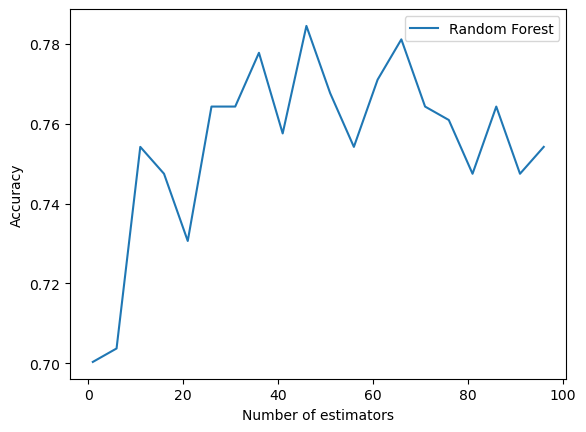

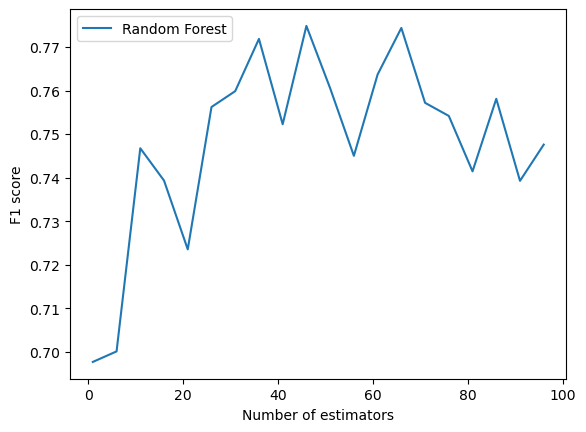

In [43]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = np.arange(1, 100, 5)
accuracy_rf = []
f1_rf = []

for n in n_estimators:
    rf = RandomForestClassifier(n_estimators=n)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy_rf.append(accuracy_score(y_test, y_pred))
    f1_rf.append(f1_score(y_test, y_pred, average='weighted'))

plt.plot(n_estimators, accuracy_rf, label='Random Forest')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(n_estimators, f1_rf, label='Random Forest')
plt.xlabel('Number of estimators')
plt.ylabel('F1 score')
plt.legend()
plt.show()

Remark: Optimal number of trees is about 50 trees, slightly less than those of bagging. Random forest is a better generalization of bagging as it uses a random subset of features for each tree. This makes the trees more independent and thus the ensemble more robust.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

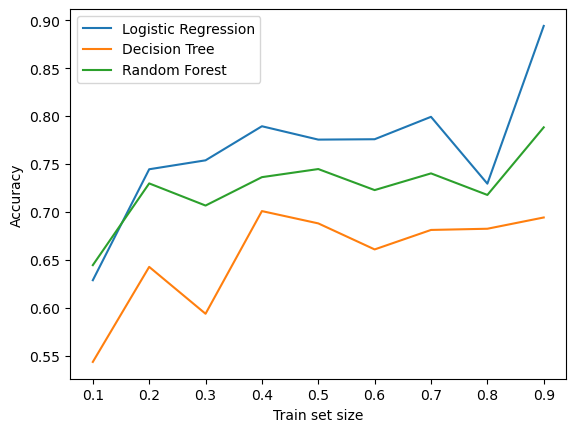

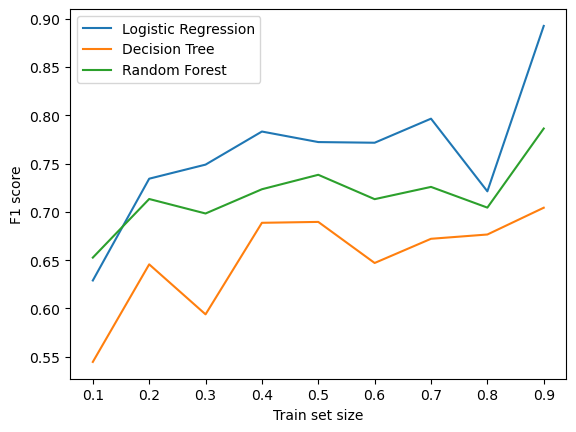

In [63]:
train_sizes = np.arange(0.1, 1.0, 0.1) # using 10% of the data as training set up to 90%
test_sizes = 1 - train_sizes

lr_accuracy = []
tree_accuracy = []
rf_accuracy = []

lr_f1 = []
tree_f1 = []
rf_f1 = []

for test_size in test_sizes:
    X_train_resplit, X_test_resplit, y_train_resplit, y_test_resplit = train_test_split(data, target, test_size=test_size)
    X_train_resplit = std_scaler.fit_transform(X_train_resplit)
    X_test_resplit = std_scaler.transform(X_test_resplit)
    y_train_resplit = label_encoder.fit_transform(y_train_resplit)
    y_test_resplit = label_encoder.transform(y_test_resplit)
    best_est_lr.fit(X_train_resplit, y_train_resplit)
    y_pred = best_est_lr.predict(X_test_resplit)
    lr_accuracy.append(accuracy_score(y_test_resplit, y_pred))
    lr_f1.append(f1_score(y_test_resplit, y_pred, average='weighted'))

    best_est_tree.fit(X_train_resplit, y_train_resplit)
    y_pred = best_est_tree.predict(X_test_resplit)
    tree_accuracy.append(accuracy_score(y_test_resplit, y_pred))
    tree_f1.append(f1_score(y_test_resplit, y_pred, average='weighted'))

    rf = RandomForestClassifier(n_estimators=50)
    rf.fit(X_train_resplit, y_train_resplit)
    y_pred = rf.predict(X_test_resplit)
    rf_accuracy.append(accuracy_score(y_test_resplit, y_pred))
    rf_f1.append(f1_score(y_test_resplit, y_pred, average='weighted'))

plt.plot(train_sizes, lr_accuracy, label='Logistic Regression')
plt.plot(train_sizes, tree_accuracy, label='Decision Tree')
plt.plot(train_sizes, rf_accuracy, label='Random Forest')
plt.xlabel('Train set size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(train_sizes, lr_f1, label='Logistic Regression')
plt.plot(train_sizes, tree_f1, label='Decision Tree')
plt.plot(train_sizes, rf_f1, label='Random Forest')
plt.xlabel('Train set size')
plt.ylabel('F1 score')
plt.legend()
plt.show()

Remark: Generally the accuracy and f1 scores increase with the increase in the size of the training dataset. This is because the model has more data to learn from and thus can generalize better. The increase may not be linear around the later stages as the model may have already learned most of the patterns in the data.

#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300}
Accuracy: 0.7475
F1: 0.7445


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

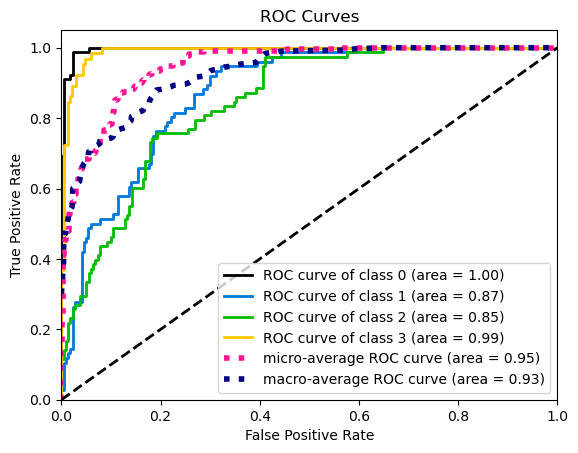

In [51]:
import xgboost as xgb

param_grid = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [2, 4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=4,
), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
y_pred = grid_search.predict(X_test)
grid_acc_score = accuracy_score(y_test, y_pred)
grid_f1_score = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {grid_acc_score:.4f}')
print(f'F1: {grid_f1_score:.4f}')

best_est_xgb = grid_search.best_estimator_
predicted_probas = best_est_xgb.predict_proba(X_test)

plot_roc(y_test, predicted_probas)


Remark: Optimal number of trees is around 300. A max depth of 6 is a good choice to avoid overfitting and to keep the model simple.